# Unit 5 - Financial Planning

In [66]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [67]:
# Load .env environment variables
result = load_dotenv("C:\\Users\\dinau\\Downloads\\keys.env")
print(f"Loading environment variables: {result}")

Loading environment variables: True


## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [68]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [69]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [70]:
# Fetch current BTC price
btc_response = requests.get(btc_url).json()

# Print the entire response to inspect its structure
print(btc_response)


{'data': {'1': {'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'website_slug': 'bitcoin', 'rank': 1, 'circulating_supply': 19654300, 'total_supply': 19654300, 'max_supply': 21000000, 'quotes': {'USD': {'price': 71323.0, 'volume_24h': 47985050030, 'market_cap': 1401794777463, 'percentage_change_1h': 0.338851196889215, 'percentage_change_24h': -2.36538415590106, 'percentage_change_7d': 6.02864728399517, 'percent_change_1h': 0.338851196889215, 'percent_change_24h': -2.36538415590106, 'percent_change_7d': 6.02864728399517}}, 'last_updated': 1710435639}}, 'metadata': {'timestamp': 1710435639, 'num_cryptocurrencies': 3119, 'error': None}}


In [71]:
# Fetch current ETH price
eth_response = requests.get(eth_url).json()

# Print the entire response to inspect its structure
print(eth_response)


{'data': {'1027': {'id': 1027, 'name': 'Ethereum', 'symbol': 'ETH', 'website_slug': 'ethereum', 'rank': 2, 'circulating_supply': 120085822, 'total_supply': 120085822, 'max_supply': 120085822, 'quotes': {'USD': {'price': 3893.21, 'volume_24h': 20690105664, 'market_cap': 467040888622, 'percentage_change_1h': 0.930080903213012, 'percentage_change_24h': -2.49782632473556, 'percentage_change_7d': 1.72361913448571, 'percent_change_1h': 0.930080903213012, 'percent_change_24h': -2.49782632473556, 'percent_change_7d': 1.72361913448571}}, 'last_updated': 1710435669}}, 'metadata': {'timestamp': 1710435669, 'num_cryptocurrencies': 3119, 'error': None}}


In [72]:
# Fetch current BTC price
btc_response = requests.get(btc_url).json()

# Access Bitcoin price using the ID "1"
btc_price = btc_response['data']['1']['quotes']['USD']['price']

# Fetch current ETH price
eth_response = requests.get(eth_url).json()
eth_price = eth_response['data']['1027']['quotes']['USD']['price']

# Compute current value of my crypto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")


The current value of your 1.2 BTC is $85587.60
The current value of your 5.3 ETH is $20634.01


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [73]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [74]:
# Set Alpaca API key and secret

alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version="v2")


In [75]:
#Alternative approach due to recieving unicode error multiple times
import re

# Format current date as ISO format
today = pd.Timestamp("2023-10-20", tz="America/New_York").isoformat()

# Remove non-ASCII characters from the ISO format string
today_cleaned = re.sub(r'[^\x00-\x7F]', '', today)

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Encode ticker symbols and timeframe as ASCII after preprocessing
tickers_cleaned = [re.sub(r'[^\x00-\x7F]', '', ticker) for ticker in tickers]
tickers_ascii = [ticker.encode('ascii', 'ignore').decode() for ticker in tickers_cleaned]
timeframe_cleaned = re.sub(r'[^\x00-\x7F]', '', timeframe)
timeframe_ascii = timeframe_cleaned.encode('ascii', 'ignore').decode()

# Print debugging information
print("Today cleaned:", today_cleaned)
print("Tickers ASCII:", tickers_ascii)
print("Timeframe ASCII:", timeframe_ascii)

# Get current closing prices for SPY and AGG
try:
    df_portfolio = alpaca.get_bars(
        tickers_ascii,
        timeframe_ascii,
        start=today_cleaned,
        end=today_cleaned,
        limit=1000
    ).df

    # Reorganize the DataFrame
    # Separate ticker data
    AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)
    SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)

    # Concatenate the ticker DataFrames
    df_portfolio_con = pd.concat([AGG, SPY], axis=1, keys=['AGG', 'SPY'])

    # Preview DataFrame
    print(df_portfolio_con)
except Exception as e:
    print("Error:", e)


Today cleaned: 2023-10-20T00:00:00-04:00
Tickers ASCII: ['AGG', 'SPY']
Timeframe ASCII: 1Day
Error: 'latin-1' codec can't encode character '\u201c' in position 0: ordinal not in range(256)


In [76]:
# Pick AGG and SPY close prices
agg_close_price = df_closing_prices["AGG"].iloc[-1]
spy_close_price = df_closing_prices["SPY"].iloc[-1]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")


NameError: name 'df_closing_prices' is not defined

In [77]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

NameError: name 'agg_close_price' is not defined

### Savings Health Analysis

In [78]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
total_crypto_wallet_value = my_btc_value + my_eth_value
total_stock_bond_value = my_agg + my_spy

# Create savings DataFrame
savings_data = [total_crypto_wallet_value, total_stock_bond_value]
columns = ['amount']
index = ['crypto', 'stock/bond']
savings_df = pd.DataFrame(savings_data, columns=columns, index=index)

# Display savings DataFrame
display(savings_df)

,amount
crypto,106221.613
stock/bond,250.000


<Axes: title={'center': 'Composition of Personal Savings'}, ylabel='amount'>

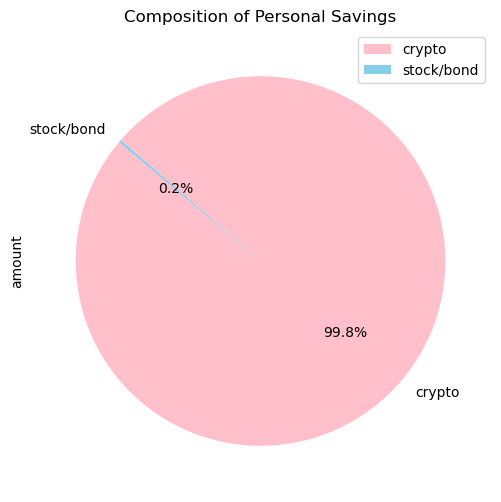

In [79]:
# Plot savings pie chart
savings_df.plot(kind='pie', y='amount', figsize=(6, 6), autopct='%1.1f%%', startangle=140, title='Composition of Personal Savings', colors=['pink', 'skyblue'])


In [80]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = total_crypto_wallet_value + total_stock_bond_value

# Print total savings and composition
print(f"\nTotal savings: ${total_savings:.2f}")
print(f"Composition of savings: Crypto: ${total_crypto_wallet_value:.2f}, Stock/Bond: ${total_stock_bond_value:.2f}")

# Validate saving health
if total_savings > emergency_fund:
    print("\nCongratulations! You have enough money in your emergency fund.")
elif total_savings == emergency_fund:
    print("\nCongratulations on reaching this important financial goal!")
else:
    shortfall = emergency_fund - total_savings
    print(f"\nYou are ${shortfall:.2f} away from reaching your emergency fund goal.")



Total savings: $106471.61
Composition of savings: Crypto: $106221.61, Stock/Bond: $250.00

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [81]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [82]:
#Trying to fix the same unicode error with alternative approaches 

import unicodedata

# Define the timeframe variable (assuming it's causing the UnicodeEncodeError)
timeframe = "1Day"

try:
    # Encode the timeframe variable directly using UTF-8
    timeframe_encoded = timeframe.encode('utf-8')

    # Get historical data
    stock_data = alpaca.get_bars(
        tickers_ascii,
        timeframe_encoded,
        start=start_date,
        end=end_date,
        limit=1000
    ).df

    # Reorganize the DataFrame
    # Separate ticker data
    AGG = stock_data[stock_data['symbol'] == 'AGG']
except UnicodeEncodeError as e:
    print("UnicodeEncodeError occurred:")
    print(f"Problematic variable: {timeframe}")
    print(e)

UnicodeEncodeError occurred:
Problematic variable: 1Day
'latin-1' codec can't encode character '\u201c' in position 0: ordinal not in range(256)


In [83]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns

sim_30y = MCSimulation(
    portfolio_data=stock_data_agg_spy,
    weights=[0.40, 0.60],  # Assuming 40% AGG and 60% SPY
    num_simulation=500,
    num_trading_days=252 * 30  #Assuming 252 trading days in a year
)

# Calculate cumulative returns
sim_30y.calc_cumulative_return()

# Print simulation input data
print(sim_30y.portfolio_data.head())


NameError: name 'stock_data_agg_spy' is not defined

In [84]:
# Printing the simulation input data
print(sim_30y.portfolio_data.head())

NameError: name 'sim_30y' is not defined

In [85]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
sim_30y.run_simulation()

NameError: name 'sim_30y' is not defined

In [86]:
# Plot simulation outcomes
sim_30y.plot_simulation()

NameError: name 'sim_30y' is not defined

In [87]:
# Plot probability distribution and confidence intervals
sim_30y.plot_distribution()

NameError: name 'sim_30y' is not defined

### Retirement Analysis

In [88]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_stats = sim_30y.summarize_cumulative_return()

# Print summary statistics
print(summary_stats)

NameError: name 'sim_30y' is not defined

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [89]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000

ci_lower = summary_stats.loc["95% CI Lower"] * initial_investment
ci_upper = summary_stats.loc["95% CI Upper"] * initial_investment


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

NameError: name 'summary_stats' is not defined

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [90]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = summary_stats.loc["95% CI Lower"] * initial_investment
ci_upper = summary_stats.loc["95% CI Upper"] * initial_investment

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

NameError: name 'summary_stats' is not defined

## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [91]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
sim_5y = MCSimulation(
    portfolio_data=stock_data,
    weights=[0.40, 0.60],  
    num_simulation=500,
    num_trading_days=252 * 5  
)


NameError: name 'stock_data' is not defined

In [92]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
sim_5y.calc_cumulative_return()

NameError: name 'sim_5y' is not defined

In [93]:
# Plot simulation outcomes
line_plot = sim_5y.plot_simulation()

NameError: name 'sim_5y' is not defined

In [94]:
# Plot probability distribution and confidence intervals
dist_plot = sim_5y.plot_distribution()

NameError: name 'sim_5y' is not defined

In [95]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_stats = sim_5y.summarize_cumulative_return()

# Print summary statistics
print(summary_stats)

NameError: name 'sim_5y' is not defined

In [96]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(summary_stats[8] * initial_investment, 2)
ci_upper_five = round(summary_stats[9] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

NameError: name 'summary_stats' is not defined

### Ten Years Retirement Option

In [97]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
sim_10y = MCSimulation(
    portfolio_data=stock_data,
    weights=[0.40, 0.60], 
    num_simulation=500,
    num_trading_days=252 * 10  
)

NameError: name 'stock_data' is not defined

In [98]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
sim_10y.calc_cumulative_return()


NameError: name 'sim_10y' is not defined

In [99]:
# Plot simulation outcomes
line_plot = sim_10y.plot_simulation()


NameError: name 'sim_10y' is not defined

In [100]:
# Plot probability distribution and confidence intervals
dist_plot = sim_10y.plot_distribution()

NameError: name 'sim_10y' is not defined

In [101]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_stats = sim_10y.summarize_cumulative_return()

# Print summary statistics
print(summary_stats)


NameError: name 'sim_10y' is not defined

In [102]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(summary_stats[8] * initial_investment, 2)
ci_upper_ten = round(summary_stats[9] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

NameError: name 'summary_stats' is not defined